# Vectors in the 3D Space &mdash; Exercises and Sample Snippets

## Draw the 3D arrow and point representing the coordinates (-1, -2, 2), as well as the dashed box that helps visualizing the vector in 3D.

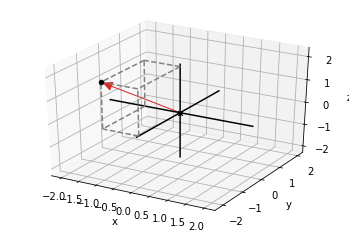

In [20]:
from draw3d import draw3d, Arrow3D, Points3D, Box3D

draw3d(
    Points3D((-1, -2, 2)),
    Arrow3D((-1, -2, 2,)),
    Box3D(-1, -2, 2)
)

## There are exactly 8 3D vectors whose coordinates are all either +1 or -1. For instance, (1, -1, 1) is one of these. Plot all these eight vectors as points, then figure out how to connect them with segments to form the outline of a cube.

Let's start by defining these vectors, and drawing the Points.

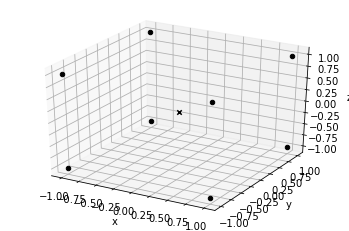

In [21]:
points = [(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1),
          (1, -1, -1),  (1, -1, 1),  (1, 1, -1),  (1, 1, 1)]

draw3d(Points3D(*points), axes=None)

Now, let's draw the Segments that connect them:

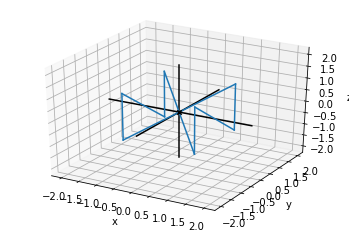

In [22]:
from draw3d import Segment3D

segments = [ Segment3D(points[i], points[(i + 1) % len(points)]) for i in range(0, len(points))]

draw3d(*segments)

The process seems to be ok, but we need to rearrange them in order to connect them and visualize them.

Let's rearrange them using faces

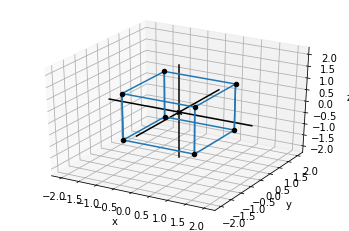

In [23]:
def get_segments_for_face(face_points):
    return [Segment3D(face_points[i], face_points[(i + 1) % len(face_points)]) for i in range(0, len(face_points))]

cube_front_face = [(-1, 1, -1), (-1, 1, 1), (1, 1, 1), (1, 1, -1)]
cube_back_face = [(-1, -1, -1), (-1, -1, 1), (1, -1, 1), (1, -1, -1)]
cube_left_face = [(-1, -1, -1), (-1, 1, -1), (-1, 1, 1), (-1, -1, 1)]
cube_right_face = [(1, -1, -1), (1, 1, -1), (1, 1, 1), (1, -1, 1)]

draw3d(
    *get_segments_for_face(cube_front_face),
    *get_segments_for_face(cube_back_face),
    *get_segments_for_face(cube_left_face),
    *get_segments_for_face(cube_right_face),
    Points3D(*points)
)

Note how the bottom and top faces didn't have to be defined.

Note also that there seems a smarter way to implement the solution.
For example:
+ the vertices can range over the list of possible values [-1, 1]
+ the edges can be grouped into three sets of four that point in each coordinate direction (e.g. there are four edges that go from x=-1 to x=1, while y and z coordinates are the same at both endpoints)

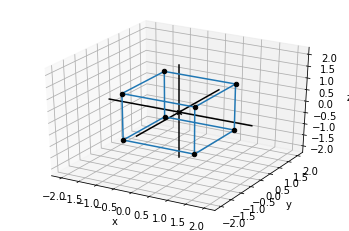

In [24]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
    [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
    [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices),
    *[Segment3D(*edge) for edge in edges]
)

## Draw $ (4, 0, 3) $ and $ (-1, 0, 1) $ as `Arrow3D` objects such that they are placed *tip-to-tail* in both orders in 3D. What is their vector sum.

We can use the `add(...)` function to calculate the vector sum and the `draw3d(...)` functions to geometrically demonstrate that $ (4, 0, 3) + (-1, 0, 1) $ is the same as $ (-1, 0, 1) + (4, 0, 3) $ 

In [25]:
def add(*vectors):
  by_coordinate_list = zip(*vectors)
  sum_by_coordinate_list = [sum(coords) for coords in by_coordinate_list]
  return tuple(sum_by_coordinate_list)

u = (4, 0, 3)
v = (-1, 0, 1)

print('u + v = {}; v + u = {}'.format(add(u, v), add(v, u)))

u + v = (3, 0, 4); v + u = (3, 0, 4)


Now let's draw it to demonstrate it geometrically:

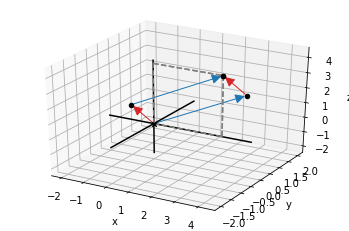

In [26]:
from draw3d import blue, red
draw3d(
    Arrow3D(u, color=blue), Points3D(u),
    Arrow3D(add(u, v), u, color=red), Points3D(add(u, v)),
    Arrow3D(v, color=red), Points3D(v),
    Arrow3D(add(v, u), v, color=blue), Points3D(add(v, u)),
    Box3D(3, 0, 4)
)

## Suppose we set `vectors1=[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]` and `vectors2=[(1, 2), (3, 4), (5, 6)]`. Without evaluating in in Python, what are the lengths of `zip(*vectors1)` and `zip(*vectors2)`.

The `zip(...)` function takes an iterable and returns another iterable in which the first element is the collection of all the first elements, the second element, the collection of all the second elements, etc.

`zip((a, b), (c, d), (e, f)) = [(a, c, e), (b, d, f)]`

Therefore:
```python
len(zip(*vectors1)) = 5 # having two elements each
len(zip(*vectors2)) = 2 # having 5 elements each
```

## The following comprehension creates a list of 24 Python vectors:

```Python
from math import sin, cos, pi

vs = [(sin(pi * t * 6), cos(pi * t * 6), 1.0 / 3) for t in range(0, 24)]
```

Calculate the sum of the 24 vectors. Draw all 24 of them *tip-to-tail* as `Arrow3D` objects.

We have alreade define `add(*v)` to calculate the sum vector. The next activity is just iterate the collection of vectors to create the *tip-to-tail*.

In [27]:
from math import sin, cos, pi

vectors = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

sum_vector = add(*vectors)
print('sum_vector={}'.format(sum_vector))

sum_vector=(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


To come up with the list comprehension, it is always a good practice to start manually with a few iterations:

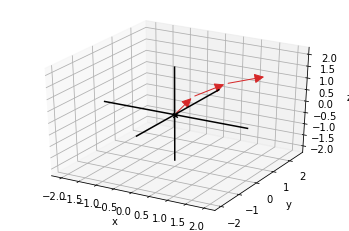

In [28]:
first_arrow = Arrow3D(vectors[0]) # this one should start from origin
second_arrow = Arrow3D(add(vectors[0], vectors[1]), vectors[0])
third_arrow = Arrow3D(
    add(vectors[0], vectors[1], vectors[2]),
    add(vectors[0], vectors[1])
)

draw3d(
    first_arrow,
    second_arrow,
    third_arrow
)

So we need:
+ in the first iteration, only `vectors[0]` is drawn
+ for the subsequent iterations we need:
  + the sum vector for range 0, iteration i + 1
  + the sum vector for range 0, iteration

Let's do with an imperative function, as creating a list comprehension seems challenging:

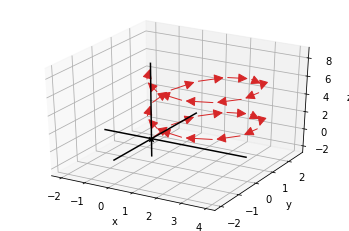

In [41]:
def get_tip_to_tail_coords(*vectors):
    coords = []
    running_sum_vector = (0, 0, 0)
    for i in range(0, len(vectors)):
        next_sum_vector = add(vectors[i], running_sum_vector)
        coords.append((next_sum_vector, running_sum_vector))
        running_sum_vector = next_sum_vector
    return [Arrow3D(v[0], v[1]) for v in coords]

draw3d(*get_tip_to_tail_coords(*vectors))



## Write a function `scale(scalar, vector)` that returns input scalar times the input vector. It must be written in a way that works for vectors of any dimension (2D, 3D, ...) 

In [42]:
def scalar_product(factor, v):
  """
  Return the vector resulting from multiplying input scalar times the input vector.

  Factor is any real number, and v is a vector given in their Cartesian coordinates.
  """
  return tuple( factor * v_i for v_i in v )

## Let $ u = (1, -1, -1) $ and $ v = (0, 0, 2) $. What is the result of $ u + \frac{1}{2} \cdot (v - u) $. How can this point be interpreted geometrically?

Using what we know of vector addition and scalar product:

$ 
u + \frac{1}{2} \cdot (v - u) = \\
= (1, -1, -1) + \frac{1}{2} \cdot ((0, 0, 2) - (1, -1, -1)) = \\
= (1, -1, -1) + \frac{1}{2} \cdot (-1, 1, 3) = \\
(1, -1, -1) + (-\frac{1}{2}, \frac{1}{2}, \frac{3}{2}) = \\
= (\frac{1}{2}, -\frac{1}{2}, \frac{1}{2})
$

In [46]:
def subtract(v, w):
  return tuple( v[i] - w[i] for i in range(0, len(v)) )

u = (1, -1, -1)
v = (0, 0, 2)

result_vector = add(u, scalar_product(0.5, subtract(v, u)))

print('u + 1/2 * (v - u) = {}'.format(result_vector))


u + 1/2 * (v - u) = (0.5, -0.5, 0.5)


The geometric representation of this point is as follows:
> As $ v - u $ is the displacement vector from $ u $ to $ v $, $ u + \frac{1}{2} \cdot (v - u) $ it is the middle point between $ u $ and $ v $. 

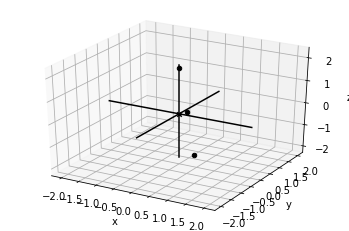

In [47]:
draw3d(
    Points3D(u, v, result_vector)
)